In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,recall_score,f1_score,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


In [32]:
df = pd.read_csv("F:/dataset_for_ML/Ensemble Learning/classification/breastcancerpredictionwinconsin.csv")

In [33]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [34]:
df.drop(columns=["id","Unnamed: 32"],inplace=True)

In [35]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
X = df.iloc[:,1:]
y = df["diagnosis"]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [38]:
dt = DecisionTreeClassifier(random_state=42)


In [46]:
param_grid = {
    'n_estimators': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [None,1, 2, 3],
    'estimator__criterion' : ["gini","entropy","log_loss"]

}

In [47]:
adc = AdaBoostClassifier(estimator=dt)

In [48]:
adc_grid = GridSearchCV(adc,param_grid,cv=5,n_jobs=-1,scoring="accuracy")

In [52]:
adc_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__criterion': ['gini', 'entropy',
                                                  'log_loss'],
                         'estimator__max_depth': [None, 1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [53]:
adc_grid.best_params_,adc_grid.best_score_

({'estimator__criterion': 'entropy',
  'estimator__max_depth': 3,
  'learning_rate': 1.0,
  'n_estimators': 15},
 0.9648351648351647)

In [59]:
print(classification_report(adc_grid.predict(X_test),y_test)),print(accuracy_score(adc_grid.predict(X_test),y_test))

              precision    recall  f1-score   support

           B       0.99      0.97      0.98        72
           M       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158


(None, None)

In [62]:
adc_grid.best_estimator_.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=3,
                        random_state=2139728989),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=795283816),
 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                        random_state=2071306928),
 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                        random_state=1338027900),
 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                        random_state=1809750454),
 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                        random_state=2137067174),
 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                        random_state=2125818149),
 DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=221634748),
 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                        random_state=1321835780),
 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                    

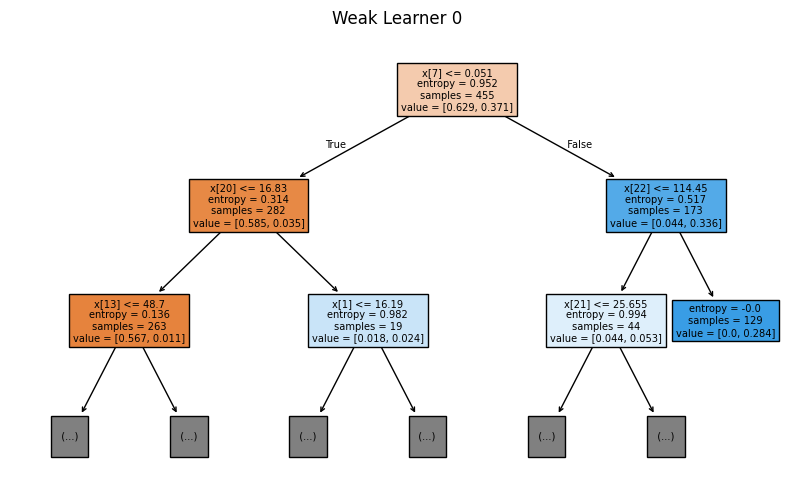

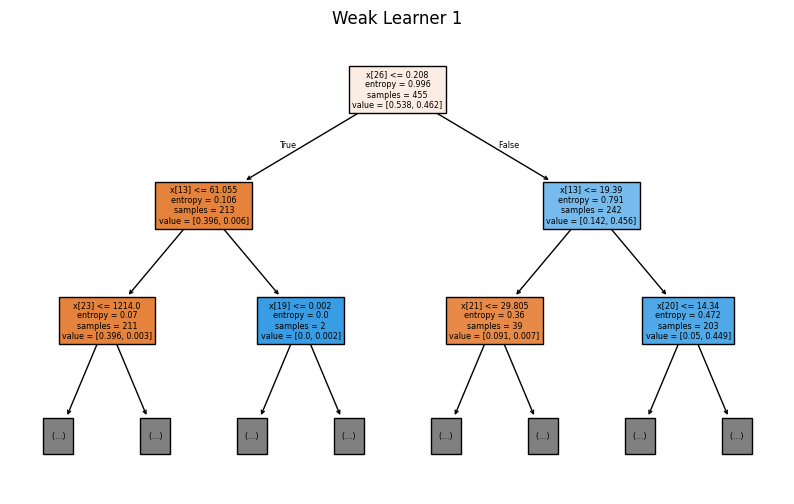

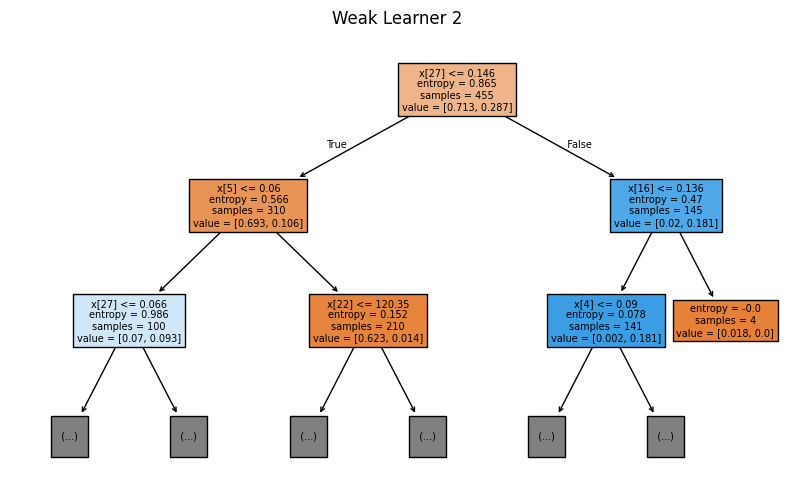

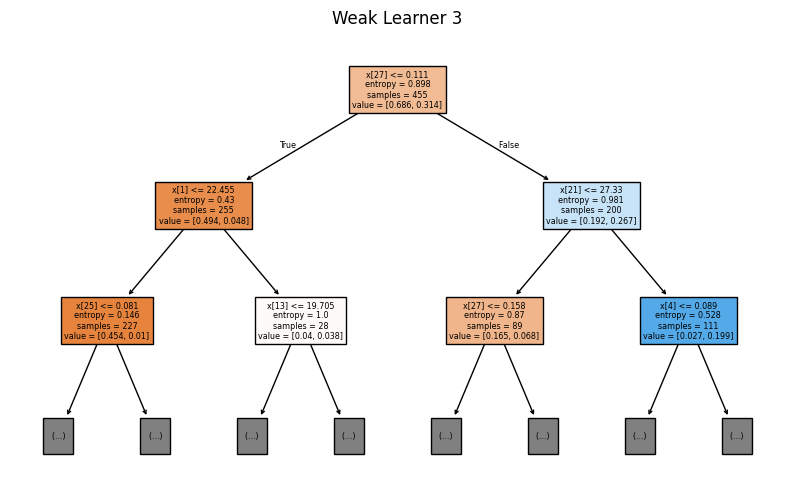

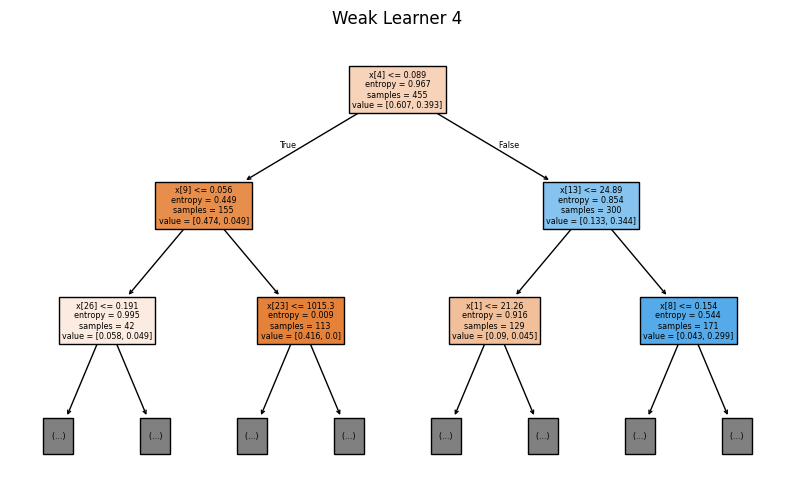

In [58]:
for i, est in enumerate(adc_grid.best_estimator_.estimators_[:5]):
    plt.figure(figsize=(10, 6))
    plot_tree(est, filled=True, max_depth=2)
    plt.title(f"Weak Learner {i}")
    plt.show()

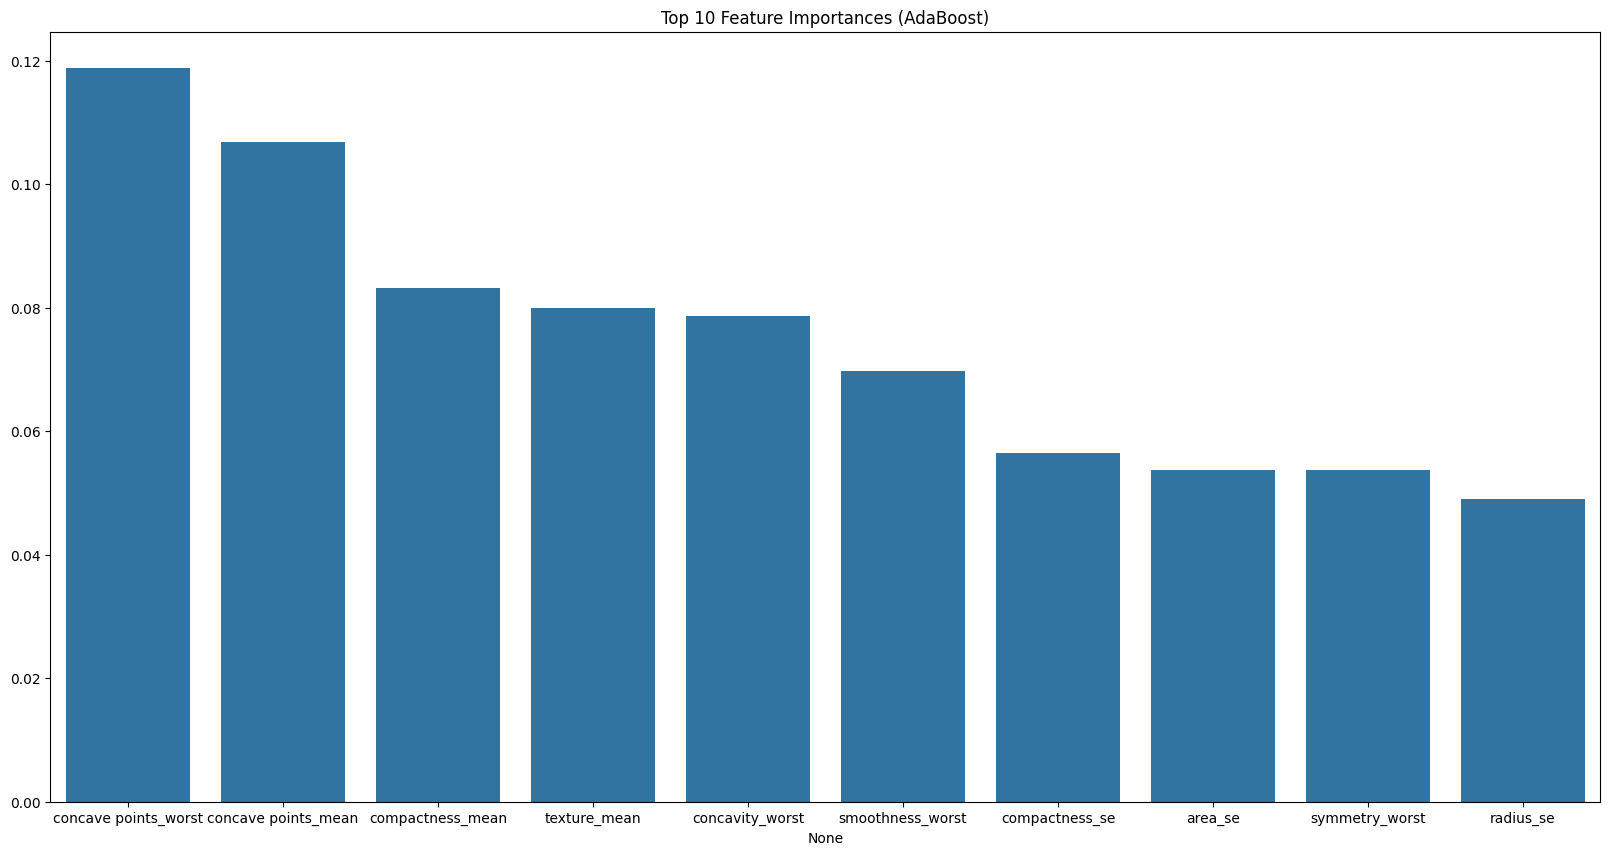

In [67]:
importances = adc_grid.best_estimator_.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x=feat_imp.index[:10], y=feat_imp.values[:10])
plt.title("Top 10 Feature Importances (AdaBoost)")
plt.show()